# Wine Quality Prediction

## Project Instructions

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

### Attribute Information:
#### Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

#### Output variable (based on sensory data):

12. quality (score between 0 and 10)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()    # Makes plot more stylish

## Loading the dataset

In [2]:
wine_data = pd.read_csv("wine-dataset.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


## Basic Analysis

### 1. Column information
We first use `info()` method to get the basic informarion about the columns in dataframe.

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


#### Observation:
- There are total of 12 columns in the dataset. The first 11 are input variables, and the quality is the output variable.
- All the columns are of type `float64`.
- There are total of 1599 entries or data points.

### 2. Checking for null values

In [4]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

#### Observation:
- There are total of 3 null values, in the columns `total sulfur dioxide`, `pH`, and `quality` respectively.

Since the number of null values (3) is very small compared to size of dataset (1599), these entried can be dropped.

In [5]:
wine_data.dropna(inplace=True)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


### 3. Checking for duplicate values

In [6]:
wine_data.duplicated().sum()

239

#### Observation:
- There are total of 239 duplucate values in the dataset. This might me because of several reasons:
    1. Due to merging of two datasets, as mentioned in the project instructions.
    2. Due to coincidence.

For now, we'll drop the duplicate values.

In [8]:
wine_data.drop_duplicates(inplace=True)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1357 non-null   float64
 1   volatile acidity      1357 non-null   float64
 2   citric acid           1357 non-null   float64
 3   residual sugar        1357 non-null   float64
 4   chlorides             1357 non-null   float64
 5   free sulfur dioxide   1357 non-null   float64
 6   total sulfur dioxide  1357 non-null   float64
 7   density               1357 non-null   float64
 8   pH                    1357 non-null   float64
 9   sulphates             1357 non-null   float64
 10  alcohol               1357 non-null   float64
 11  quality               1357 non-null   float64
dtypes: float64(12)
memory usage: 137.8 KB


The dataset now contains 1357 entries, with no duplicate or null values.

### 4. Description of numerical values

In [9]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,8.312012,0.529278,0.272579,2.523803,0.088136,15.902727,46.824245,0.996708,3.497856,0.658858,10.433837,5.623434
std,1.737699,0.183084,0.195533,1.353203,0.049412,10.451925,33.429220,0.001870,0.081566,0.170743,1.082129,0.823948
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


#### Observation:
- In the pH column, the 25%, 50%, and 75% values are all `3.52`. This means that more than half of the values are `3.52`. It is better to further analyse this later.

## Exploratory Data Analysis
In this section, we will try to answer several questions by visualising the data.

## 1. How are the values in `quality` distributed?

We first find what values are present in quality.

In [10]:
wine_data['quality'].unique()

array([5., 6., 7., 4., 8., 3.])

We use groupby to find how many entries are present for each quality.

In [14]:
quality_count = wine_data.groupby('quality')['fixed acidity'].count()
quality_count

quality
3.0     10
4.0     53
5.0    576
6.0    534
7.0    167
8.0     17
Name: fixed acidity, dtype: int64

We can also display this in form of bar chart.

<AxesSubplot:xlabel='quality'>

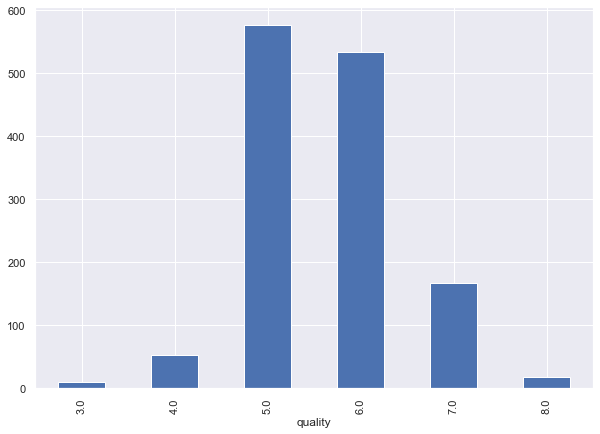

In [22]:
quality_count.plot(kind='bar', figsize=(10,7))

### Insights:
- The majority of the entries have quality of 5 or 6.
- The quality of 3 and 8 are the least. These must be the outliers mentioned in the project instructions.

## 2. How is the correlation between the columns?

We use `corr()` mwthod to get the correlation matrix for the dataset.

In [24]:
wine_corr = wine_data.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254854,0.667757,0.110763,0.085768,-0.141246,-0.103565,0.670647,0.028799,0.189972,-0.062488,0.119310
volatile acidity,-0.254854,1.000000,-0.550781,-0.002323,0.055367,-0.020344,0.071856,0.023552,-0.044660,-0.256420,-0.197026,-0.395122
citric acid,0.667757,-0.550781,1.000000,0.143961,0.210145,-0.048714,0.047112,0.358791,-0.001313,0.325518,0.104126,0.227625
residual sugar,0.110763,-0.002323,0.143961,1.000000,0.026603,0.160349,0.201251,0.324611,0.045385,-0.011966,0.063009,0.013832
chlorides,0.085768,0.055367,0.210145,0.026603,1.000000,0.000589,0.045795,0.193693,-0.278729,0.394525,-0.224228,-0.131059
free sulfur dioxide,-0.141246,-0.020344,-0.048714,0.160349,0.000589,1.000000,0.667648,-0.017826,-0.038800,0.053640,-0.081084,-0.050499
total sulfur dioxide,-0.103565,0.071856,0.047112,0.201251,0.045795,0.667648,1.000000,0.078242,-0.163559,0.035247,-0.217899,-0.178297
density,0.670647,0.023552,0.358791,0.324611,0.193693,-0.017826,0.078242,1.000000,-0.043731,0.146409,-0.504961,-0.184108
pH,0.028799,-0.044660,-0.001313,0.045385,-0.278729,-0.038800,-0.163559,-0.043731,1.000000,-0.252675,0.238420,0.132602
sulphates,0.189972,-0.256420,0.325518,-0.011966,0.394525,0.053640,0.035247,0.146409,-0.252675,1.000000,0.090874,0.248713


We now use the `heatmap()` of the seaborn to visualise the correlation matrix

<AxesSubplot:>

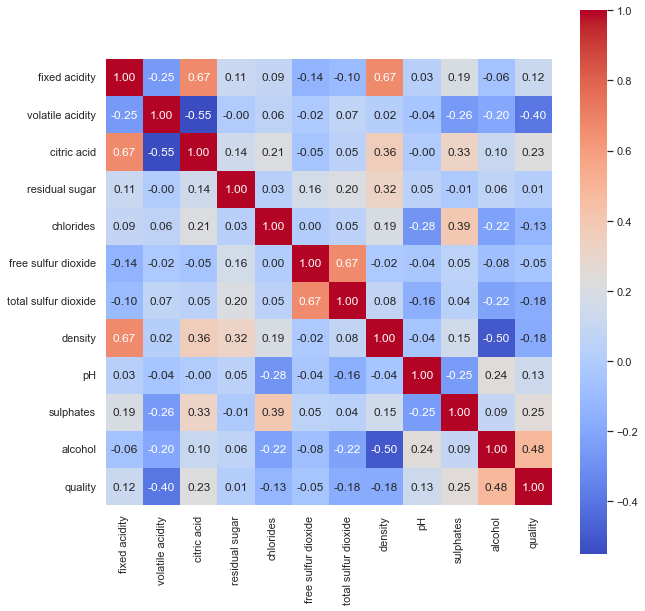

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_corr, square=True, annot=True, fmt=".2f", cmap="coolwarm")

### Insights:
- `fixed acidity` is highly correlated to `citric acid` and `density`.
- `free sulfur dioxide` and `total sulfur dioxide` are highly correlated.
- The other noteworthy pairs are:
    - citric acid and fixed acidity
    - alcohol and quality
    - alcohol and density

## 3. What is the relationship between fixed acidity and citric acid?

We use the seaborn's `scatterplot()` method with fixed acidity in x-axis and citric acid on y-axis.

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

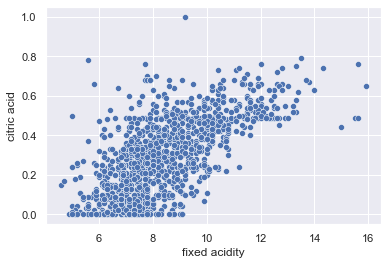

In [29]:
sns.scatterplot(data=wine_data, x='fixed acidity', y='citric acid')

### Insights:
- The citric acid is increasing as the fixed acidity is increasing.